<a id="toc"></a>
# Table of Contents
## [Merge Examples](#merge)
## [Cleaning Data with Pandas](#clean)
#### [Removing Spaces](#spaces)
#### [Enforcing Datatypes](#datatypes)
#### [Removing Duplicates](#dupes)
#### [Dropping Rows with Missing Values](#dropna) 
## [Adding a Column with a Calculation](#add)
## [Building a Report Function](#report)


<a id="merge"></a>
## Merge Examples
[Back to Table of Contents](#toc)

To better understand how to use **merge** let's look at a few examples and what they mean.

There are four types of "merges" (what we can think of as JOINs in SQL) 'left', 'right', 'outer', 'inner'. Here's a useful table which explains how we can get specific data.
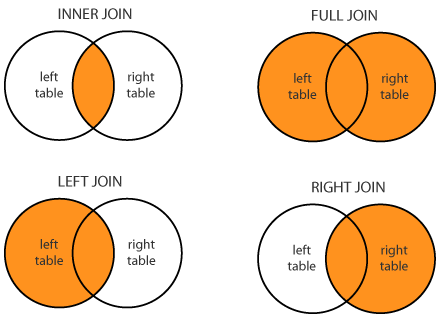
[Image from dofactory](https://www.dofactory.com/sql/join)

Let's create a few dataframes and perfom some joins to see the results.

In [ ]:
import pandas as pd

df_left = pd.DataFrame(
    {
        'keys': ['A', 'B', 'C', 'D'],
        'values': [7, 123, 8, 54]
    }
)

df_right = pd.DataFrame(
    {'keys': ['A', 'C', 'M', 'Z'],
    'other_values': ['yes', 'no', 'no', 'yes']
    }
)

print(df_left)
print(df_right)

In [26]:
# Let's do the most common merge/join - inner

df_inner_merge = df_left.merge(df_right, how='inner')
df_inner_merge

,keys,values,other_values
0,A,7,yes
1,C,8,no


In [27]:
# left merge/join

df_left_merge = df_left.merge(df_right, how='left')
df_left_merge

,keys,values,other_values
0,A,7,yes
1,B,123,NaN
2,C,8,no
3,D,54,NaN


In [28]:
# right merge/join

df_right_merge = df_left.merge(df_right, how='right')
df_right_merge

,keys,values,other_values
0,A,7.0,yes
1,C,8.0,no
2,M,NaN,no
3,Z,NaN,yes


In [29]:
# outer merge/join

df_outer_merge = df_left.merge(df_right, how='outer')
df_outer_merge

,keys,values,other_values
0,A,7.0,yes
1,B,123.0,NaN
2,C,8.0,no
3,D,54.0,NaN
4,M,NaN,no
5,Z,NaN,yes


See the differences?

- The _inner_ merge has 2 rows - the two keys that are in both sets of data.
- The _left_ merge has 4 rows - all keys from the left table but the ones without corresponding values in the right table have NaN (Not a Number) for its 'other_values' column.
- The _right_ merge has 4 rows as well - all the keys from the right table but the ones without corresponding values in the left table have NaN for its 'values' column.
- The _outer_ merge has 6 rows - all keys from the right and left tables with NaN in value/other_value columns where there is not a corresponding key.

<a id="clean"></a>
## Cleaning Data with Pandas
[Back to Table of Contents](#toc)

There are several basic operations we can perform on columns in a dataframe to make sure that our data is clean and ready to use for analysis.

Here are four key operations we'll want to perform:

- Remove leading and trailing spaces
- Enforce datatypes
- Removing duplicates
- Dropping rows with missing values

<a id="spaces"></a>
### Removing Spaces
[Back to Table of Contents](#toc)

Removing spaces is fairly self-explanatory. It becomes very important later when we need to merge to make sure that data is comparable.

In [30]:
# Create a dataframe

df_spaced = pd.DataFrame(
    { 
        'party_people': ['Will     ', 'Juan', '        Liu ', '    Erica '],
        'party_level': [43, 71, 88, 39],
        'available_friday': [True, True, True, False]
    }
)

print(df_spaced)

   party_people  party_level  available_friday
0     Will                43              True
1          Juan           71              True
2          Liu            88              True
3        Erica            39             False


In [32]:
# now let's remove the spaces:

df_spaced['party_people'] = df_spaced['party_people'].str.strip()
print(df_spaced)

,party_people,party_level,available_friday
0,Will,43,True
1,Juan,71,True
2,Liu,88,True
3,Erica,39,False


<a id="datatypes"></a>
### Enforcing Datatypes
[Back to Table of Contents](#toc)

Enforcing datatypes is a bit more complex. For example, when a spreadsheet is read into memory for pandas to use, it looks at what Excel tells it the column is and then tries to discern the type. If there is a mix of datatypes (e.g. strings and integers) in the same column then the datatype which results may not be what you expect. Alternatively, if excel has stored a number as "TEXT"/string when you need it for calculations that may cause errors. Or there may even be a situation where you want a number to be addressed as a string.

In [33]:
# Create a dataframe

df_bad_types = pd.DataFrame(
    {
        'product': ['cool shoes', 'uncool shoes', 'box for cats', 'puppy chow'],
        'number_purchased': ['NA', 30, 10, 11]
    }

)

df_bad_types.info()
print()
print(df_bad_types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
product             4 non-null object
number_purchased    4 non-null object
dtypes: object(2)
memory usage: 72.0+ bytes

        product number_purchased
0    cool shoes               NA
1  uncool shoes               30
2  box for cats               10
3    puppy chow               11


In [36]:
# Recipe to check if a value is an integer and return it if so
def convert_to_number(val):
    try:
        return int(val)
    except ValueError:
        return 0

    
df_bad_types['number_purchased'] = df_bad_types['number_purchased'].apply(convert_to_number)
df_bad_types.info()

print()
print(df_bad_types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
product             4 non-null object
number_purchased    4 non-null int64
dtypes: int64(1), object(1)
memory usage: 88.0+ bytes

        product  number_purchased
0    cool shoes                 0
1  uncool shoes                30
2  box for cats                10
3    puppy chow                11


<a id="dupes"></a>
### Removing Duplicates
[Back to Table of Contents](#toc)

In many situations we're handed data with duplicate values which can skew calculations. It is a simple process to remove duplicates and something you should (typically) always attempt to do before attempting to build reports from your data.
[More information available in the docs.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

In [37]:
# create a dataframe

df_dupes = pd.DataFrame(
    {
        'keys': ['A', 'B', 'B', 'A', 'C', 'A'],
        'values': [1, 2, 2, 2, 1, 1]
    }
)
df_dupes

,keys,values
0,A,1
1,B,2
2,B,2
3,A,2
4,C,1
5,A,1


In [38]:
# recipe for removing duplicates

df_dupes = df_dupes.drop_duplicates()
df_dupes

,keys,values
0,A,1
1,B,2
3,A,2
4,C,1


<a id="dropna"></a>
### Dropping Rows with Missing Values
[Back to Table of Contents](#toc)

If we're doing calculations with certain columns and we don't want to account for empty values by zeroing them out (because it will skew the calculation), we can drop those rows entirely.
[More info availabe in the docs.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [39]:
# create our dataframe
import numpy as np

df_empties = pd.DataFrame(
    {
        'dow': ['M', 'T', 'W', 'Th', 'F', 'S', 'Su'],
        'wkly_avg_sales': [1324, 324, np.nan, 3489, np.nan, 2134, np.nan],
        'sales_id': ['x123', 'y432', 'x123', 'y432', 'm987', 'a456', 'x123'],
        'sales_city': [np.nan, 'Miami', 'Miami', 'Louisville', np.nan, 'Louisville', 'Miami']
    }
)
df_empties2 = pd.DataFrame(df_empties) # we're copying the dataframe for later.

df_empties

,dow,wkly_avg_sales,sales_id,sales_city
0,M,1324.0,x123,NaN
1,T,324.0,y432,Miami
2,W,NaN,x123,Miami
3,Th,3489.0,y432,Louisville
4,F,NaN,m987,NaN
5,S,2134.0,a456,Louisville
6,Su,NaN,x123,Miami


In [40]:
# recipe for removing empties

df_empties = df_empties.dropna()
df_empties

,dow,wkly_avg_sales,sales_id,sales_city
1,T,324.0,y432,Miami
3,Th,3489.0,y432,Louisville
5,S,2134.0,a456,Louisville


In [43]:
# What if we only want to remove rows that are missing values from a certain column? Here's how.

df_empties2 = df_empties2.dropna(subset=['sales_city'])
df_empties2

,dow,wkly_avg_sales,sales_id,sales_city
1,T,324.0,y432,Miami
3,Th,3489.0,y432,Louisville
5,S,2134.0,a456,Louisville


<a id="add"></a>
## Adding a Column with a Calculation
[Back to Table of Contents](#toc)

Adding a column to a dataframe is fairly easy but it requires a special recipe.

In [44]:
# create a dataframe

df_calc = pd.DataFrame(
    {
        'item': ['pen', 'pencil', 'paper', 'stapler', 'cool pen', 'cool pencil'],
        'price': [2.3, 1.6, .03, 9.2, 3.99, 2.49],
        'tariff': [.2, .1, .1, .3, .2, .2]
    }
)

df_calc

,item,price,tariff
0,pen,2.30,0.2
1,pencil,1.60,0.1
2,paper,0.03,0.1
3,stapler,9.20,0.3
4,cool pen,3.99,0.2
5,cool pencil,2.49,0.2


**We want to** create a new column called **'tariff_price'** which is the price multiplied by 1 + the tariff. To do this we use a structure called a _lambda_ which creates a mini-function in place. Don't worry too much about it now, just use it as a recipe.

In [45]:
df_calc = df_calc.assign(tariff_price = lambda x: (x['price'] * (x['tariff'] + 1)))
df_calc

,item,price,tariff,tariff_price
0,pen,2.30,0.2,2.760
1,pencil,1.60,0.1,1.760
2,paper,0.03,0.1,0.033
3,stapler,9.20,0.3,11.960
4,cool pen,3.99,0.2,4.788
5,cool pencil,2.49,0.2,2.988


<a id="report"></a>
## Building a Report Function

[Back to Table of Contents](#toc)

There are times when we need to be able to chop a dataset into multiple parts for analysis

In [46]:
df_main = pd.read_excel('FAKE_DATA_BUILD.xlsx', sheet_name="Main")
df_main

,DATETIME,ORGN_CTRY_CODE,DEST_CTRY_CODE,PKG_LENGTH,PKG_HEIGHT,PKG_WIDTH,TRANSPO_TYPE,CUSTOMS_TYPE,DECLARED_VALUE_USD,SOLUTION_TYPE,SALES_CTRY_CODE,EMPLOYEE_ID,COMPANY_ID,INVOICE_NUM,INVOICE_REV,INVOICE_PAID,DATE_PAID
0,2013-01-16 08:28:14.337,US,MX,5,15,17,Truck,INFORMAL,910,SP,US,FOG3270,42-2505001,T412903270018583111,24.60,False,NaT
1,2015-03-24 01:39:06.203,CR,US,26,10,20,Air,FORMAL,5632,SP,CR,VWH4794,472932-KVM,A420874794016782128,147.08,True,2015-04-11 01:39:06.203
2,2017-03-11 01:13:17.850,UY,CO,49,26,29,Truck,FORMAL,4866,SP,UY,CDV8654,201321-QLC,T428058654018589150,146.39,True,2017-04-22 01:13:17.850
3,2016-04-11 08:55:39.405,PE,CA,88,15,6,Air,INFORMAL,159,SP,PE,ONG7753,437115-JQJ,A424717753018069139,20.67,True,2016-09-05 08:55:39.405
4,2015-10-02 15:23:18.090,DO,US,76,12,6,Truck,INFORMAL,377,SP,DO,OTZ5266,548335-WIM,T422805266016879168,20.45,True,2015-11-18 15:23:18.090
5,2014-08-06 13:01:41.293,CA,US,91,17,11,Rail,INFORMAL,2672,SP,CA,OJC3762,562-EN911079,R418583762016765153,22.40,True,2015-01-26 13:01:41.293
6,2017-07-09 03:41:37.064,BR,SV,48,58,40,Air,INFORMAL,1159,FF,BR,LML1551,69.596.270/0001-03,A429251551026682169,418.00,True,2017-07-14 03:41:37.064
7,2017-10-15 05:41:06.616,AR,PE,39,20,10,Air,INFORMAL,1545,SP,AR,FAC1186,408142-OVQ,A430231186016582198,20.70,True,2018-03-29 05:41:06.616
8,2018-03-16 06:16:32.985,VE,CL,100,10,6,Air,INFORMAL,816,SP,VE,QZQ5495,452089-JJC,A431755495018669109,20.64,True,2018-07-03 06:16:32.985
9,2016-03-28 07:03:09.061,MX,US,60,5,13,Truck,INFORMAL,1715,SP,US,CNM2808,148976-GTZ,T424572808018583152,24.60,False,NaT


In [47]:
def write_report(df, country_code, writer_obj):
    df_inner = df[df["ORGN_CTRY_CODE"] == country_code]
    df_inner.to_excel(writer_obj, sheet_name=country_code, index=False)
    print("Country Code {0} Completed!".format(country_code))
    
df_main = pd.read_excel('FAKE_DATA_BUILD.xlsx', sheet_name="Main")
writer = pd.ExcelWriter('country_reports.xlsx', engine='xlsxwriter')
lst_countries = list(df_main["ORGN_CTRY_CODE"].unique())

for ctry in lst_countries:
    write_report(df_main, ctry, writer)

writer.save()

Country Code US Completed!
Country Code CR Completed!
Country Code UY Completed!
Country Code PE Completed!
Country Code DO Completed!
Country Code CA Completed!
Country Code BR Completed!
Country Code AR Completed!
Country Code VE Completed!
Country Code MX Completed!
Country Code CL Completed!
Country Code PY Completed!
Country Code PR Completed!
Country Code BO Completed!
Country Code EC Completed!
Country Code PA Completed!
Country Code CO Completed!
Country Code GP Completed!
Country Code GT Completed!
Country Code HT Completed!
Country Code HN Completed!
Country Code MQ Completed!
Country Code NI Completed!
Country Code SV Completed!
Country Code GF Completed!
Country Code BL Completed!


In [49]:
def write_report(df, transpo, writer_obj):
    df_inner = df[df["TRANSPO_TYPE"] == transpo]
    df_inner.to_excel(writer_obj, sheet_name=transpo, index=False)
    print("Transportation Type {0} Completed!".format(transpo))
    
df_main = pd.read_excel('FAKE_DATA_BUILD.xlsx', sheet_name="Main")
writer = pd.ExcelWriter('transpo_reports.xlsx', engine='xlsxwriter')
lst_transpo = list(df_main["TRANSPO_TYPE"].unique())

for tran in lst_transpo:
    write_report(df_main, tran, writer)

writer.save()

Transportation Type Truck Completed!
Transportation Type Air Completed!
Transportation Type Rail Completed!
Transportation Type Ocean Completed!
